# Gradiente decendente
$f(x) = W_0+W_1X_1+W_2X_2+...+W_jX_j$


$$E(W)=\frac {1}{2N} \sum_{i=1}^N 2(f(X_i)-Y_i)^2$$


$$(\partial E)/(\partial W_j) =\frac {1}{2N}\sum_{i=1}^N 2(f(X_i)-Y_i)^2$$

algoritmo general para GD

    W = zero(d) //vector de ceros
    eta = 1
    MaxIter = 100

    for iter in range(MaxIter):
        for j in range(d):
            Sum += W*X[1,.] //X[1,.]: sum/N
            W[j] = W[j] - eta

        

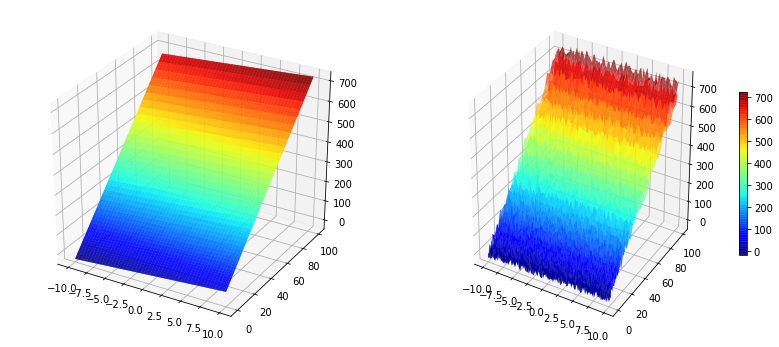

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
Perror = 0.3
fig = plt.figure(figsize=(14,6))
x1 = np.linspace(-10,10,100).reshape(100, 1)
x2 = x1**2
y = 3*x1 + 7*x2 - 2
y2 = y + Perror*np.std(y)*(np.random.rand(100,1) - 0.5)
X1, X2 = np.meshgrid(x1, x2)
Y = 3*X1 + 7*X2 - 2
Y2 = y + Perror*np.std(y)*(np.random.rand(100,100) - 0.5)
ax = fig.add_subplot(1, 2, 1, projection='3d')
p=ax.plot_surface(X1, X2, Y, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)

## surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X1, X2, Y2, rstride=2, cstride=2, cmap=cm.jet, alpha=0.7)
cb = fig.colorbar(p, shrink=0.5)

## haciendo el gradiente decendente

[[2.76653793]
 [6.92747583]
 [1.42077319]]
 Error =  164.6860399683927


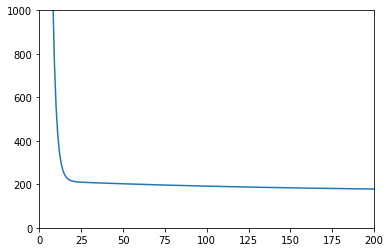

In [4]:
MaxIter = 100000
w = np.ones(3).reshape(3, 1)
eta = 0.0001
N = len(x1)
Error =np.zeros(MaxIter)
X = np.array([x1,x2,np.ones((100,1))]).reshape(3, 100);
for i in range(MaxIter):
    tem = np.dot(X.T,w)
    tem2 = tem-np.array(y2)
    Error[i] = np.sum(tem2**2)/(2*N)
    tem = np.dot(X,tem2)
    wsig = w - eta*tem/N
    w = wsig
print(w)
print(' Error = ',Error[-1])
plt.ylim(0,1000)
plt.xlim(0,200)
plt.ion()
plt.plot(np.linspace(0,MaxIter,MaxIter),Error)
plt.show()

## Regresion logistica

$f(x)= -x_2 + x_1 - 1$

In [9]:
hola = -2.8+5-1
print (hola)


1.2000000000000002


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn import datasets
from IPython import display
import time

def sigmoide(u):
    return np.exp(u)/(1 + np.exp(u))


In [ ]:
%matplotlib inline

def GradientSigmo(MaxIter=10000, eta = 0.001):
    plt.clf()
    plt.figure(figsize=(30,10))
    plt.axis([None, None, 0, 100])
    iris = datasets.load_iris()
    X, y = iris.data, iris.target
    X2 = X[:100][:,:2]
    y2 = y[:100]
    #Aprendizaje
    w = np.ones(3).reshape(3, 1)
    N = len(y2)
    Error =np.zeros(MaxIter)
    Xent = np.concatenate((X2,np.ones((100,1))),axis=1)

    for i in range(MaxIter):
        tem = np.dot(Xent,w)
        tem2 = sigmoide(tem.T)-np.array(y2)
        Error[i] = np.sum(np.abs(tem2))/N
        tem = np.dot(Xent.T,tem2.T)
        wsig = w - eta*tem/N
        w = wsig
        
        #plt.subplot(1,2,2)
        iris = datasets.load_iris()
        X, y = iris.data, iris.target
        X2 = X[:100][:,:2]
        y2 = y[:100]
        plt.scatter(X2[:,0], X2[:,1], c=y2,cmap="Accent");
        x1 = np.linspace(4,8,20)
        x2 = -(w[0]/w[1])*x1 - (w[2]/w[1])

        plt.plot(x1,x2)
        plt.show()
        display.clear_output(wait=True)
        


    print(w)
    print('Error=',Error[-1])
    #Grafica de la frontera encontrada
    plt.subplot(1,2,2)
    iris = datasets.load_iris()
    X, y = iris.data, iris.target
    X2 = X[:100][:,:2]
    y2 = y[:100]
    plt.scatter(X2[:,0], X2[:,1], c=y2,cmap="Accent");
    x1 = np.linspace(4,8,20)
    x2 = -(w[0]/w[1])*x1 - (w[2]/w[1])
    
    plt.plot(x1,x2)
    #plt.show()
    print(MaxIter,eta)

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
interact(GradientSigmo,MaxIter=[1,10,100,1000,10000], eta=[0.01,0.1,1,10]);


interactive(children=(Dropdown(description='MaxIter', index=4, options=(1, 10, 100, 1000, 10000), value=10000)…

# clase 9 de Agosto

![title]("img/kernel-trick.jpeg")

funcion de probabilidad normal

$$p(x)=\frac{1}{\sqrt{2\pi }} exp(-\frac{1}{2}\frac{(x-\mu )^2)}{^{\sigma ^2}})$$

pero como necesitamos que la funcion sea de varias variables queda dada por
$$p(x)=\frac{1}{(2\pi)^\frac{d}{2} \left | \sum  \right | ^\frac{1}{2}} exp(-\frac{1}{2} (x-\mu )^T \sum ^{-1} (x-\mu ))$$

donde $\left | \sum  \right |$ es la Matriz de covarianza $[d\times d]$ y $\mu$ es el vector de medias $[d \times]$

verosimilitud lo que hace es tratar de encontrar una funcion de probabilidad que se ajuste a los datos que se tienen, osea mas cercana a la realidad

## Maximo Verosimilitud

$$max  p(x_{1},x_{2},x_{3},...,x_{n})$$

si las muestras son independientes

$$max \prod_{i=1}^{N} p(x_{i})$$

$$\iota  = \sum_{i=1}^{N} log(p(x_{i}))$$

....

contunua reemplazando  xi por la funcion de probabilidad y haceindo la derivada con rescpecto a mu obtenemos la ecuacion de la media



## Discriminativo
se refiere a una frontera

## Generativo
fdp x clase

